# Re-doing the Iris analysis - Using a Naive Bayes Classifier

#Research question
[_Phrase your research question here. (Remember: you want to classify.) You can reuse the question from your SVM classifier.)_]

Is it possible to predict the species with only having information about the petal? Or might the information about sepals be more significant to predict the sepcies of iris?


## Analysis
[_write a brief introduction to your analysis below. Briefly describe your classifier_]

Aim is to figure out if information about petal or sepal are more significant to dassign a flower to its iris species.


### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()

### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [2]:
###########################################
#------------------PETAL------------------#
###########################################

Xpetal = iris.data[:, 2:4] # [All Rows, Includes Column 2: Excludes Column 4] Just Petal is selected
ypetal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased

###########################################
#------------------SEPAL------------------#
###########################################

Xsepal = iris.data[:,:2] # [All Rows, rom column 0: Excludes column 2] Just Sepal is selected
ysepal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [3]:
from sklearn.cross_validation import train_test_split

#A Test Set size of 0.1 leads to the highest accuracy of petal data(0.53)
#A Test Set size of 0.3 leads to the highest accuracy of sepal data(0.77)
#Everything below this test sizes leads to bias (underfitting), everything above this test sizes leads to variance(overfitting).
###########################################
#------------------PETAL------------------#
###########################################
#
Xpetal_learn, Xpetal_test, ypetal_learn, ypetal_test = train_test_split(Xpetal, ypetal, test_size=0.05, random_state = 0); #Size of trainingset = 85% of whole dataset

###########################################
#------------------SEPAL------------------#
###########################################

Xsepal_learn, Xsepal_test, ysepal_learn, ysepal_test = train_test_split(Xsepal, ysepal, test_size=0.05, random_state = 0); #Size of trainingset = 85% of whole dataset

C:\Users\Julia\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 4. fit the model using the train set, applying the naive Bayes classifier
[_describe how you are going to fit the model and what model parameters you are using_]

In [4]:
from sklearn.naive_bayes import GaussianNB
models = GaussianNB()

###########################################
#------------------PETAL------------------#
###########################################

models.fit(Xpetal, ypetal);

###########################################
#------------------SEPAL------------------#
###########################################

models.fit(Xsepal, ysepal);

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

[1 1 2 1 2 1 2 1]
[2 1 0 2 0 2 0 1]
Accuracy of prediction with petal is:  0.25


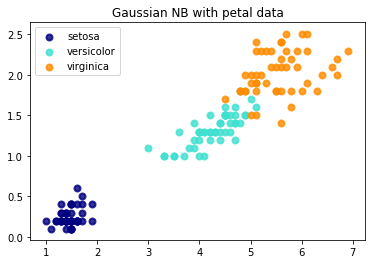

[1 1 0 2 0 2 0 2]
[2 1 0 2 0 2 0 1]
Accuracy of prediction with petal is:  0.75


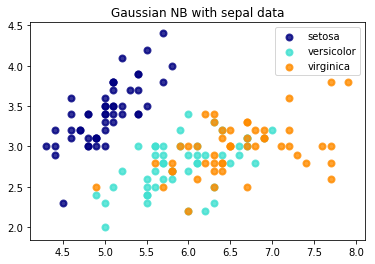

In [5]:
from sklearn.metrics import accuracy_score

###########################################
#------------------PETAL------------------#
###########################################

resultPetal = models.predict(Xpetal_test)
print(resultPetal)
print(ypetal_test)


print("Accuracy of prediction with petal is: ", accuracy_score(ypetal_test, resultPetal))

target_names = iris.target_names
plt.figure()
plt.title("Gaussian NB with petal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xpetal[ypetal == i, 0], Xpetal[ypetal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show();

###########################################
#------------------SEPAL------------------#
###########################################

resultSepal = models.predict(Xsepal_test)
print(resultSepal)
print(ysepal_test)


print("Accuracy of prediction with petal is: ", accuracy_score(ysepal_test, resultSepal))

target_names = iris.target_names
plt.figure()
plt.title("Gaussian NB with sepal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xsepal[ysepal == i, 0], Xsepal[ysepal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show();

## Discussion of result
[_ reflect on the accuracy of your result and whether you have properly answered your research question _]

With 10% test data the petal data reaches its highest accuracy of 53% correct answers.
With 30% test data the sepal data reaches its highest accuracy of 77% correct answers.
With 53% of correct answers as highest accuracy the petal data are not significant enough to predict the species
This leads to the assumption that the sepal data are the better choice to predict the species of iris. 

Quite interesting is the fact, that the data in the graphics do not lead to the same assumption as the accuracy does.
With just evaluating the graphics, it should be easier to separate the three species with petal data, and therefore also the prediciton should be more accurate with petal data.

## Comparison of classifiers
[_reflect on the preferred choice of classifier now that you've used SVM, DT and NB classifiers in terms of __bias__ and __variance__ of the applied classifiers_]

SVM: The best way to predict the species (80% accuracy) is with help of sepal data and 70% Train Set.
NB: The best way to predict the species (77% accuracy) is with help of sepal data and 70% Train Set.
Bias and variance are already taken into account in fining the highes accuracy in each model.
As you can see the SVM is more accurate than NB with the same amount of training data. This leads to the assumption that SVM is the better choice for the Iris Dataset.